## 과제3
이름: 이원석

학번: 201902702

학과: 컴퓨터전자시스템공학부

In [34]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## 1. Sobel 에지 검출
본인이 촬영한 영상(크기를 800x800 이하로 조절)에 Sobel 에지 검출 을 수행하고 소스 코드와 결과 영상을 제시. 수평과 수직방향 에지 검출 결과와 gradient magnitude로 결합한 결과 영상을 제시

(1440, 1080, 3)
(800, 800, 3)


(-0.5, 799.5, 799.5, -0.5)

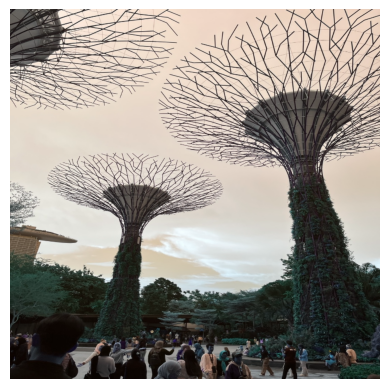

In [92]:
image = cv.imread('./img/my_img.jpeg')
print(image.shape)
image = cv.resize(image, (800,800))
print(image.shape)
plt.imshow(image) 
plt.axis('off')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


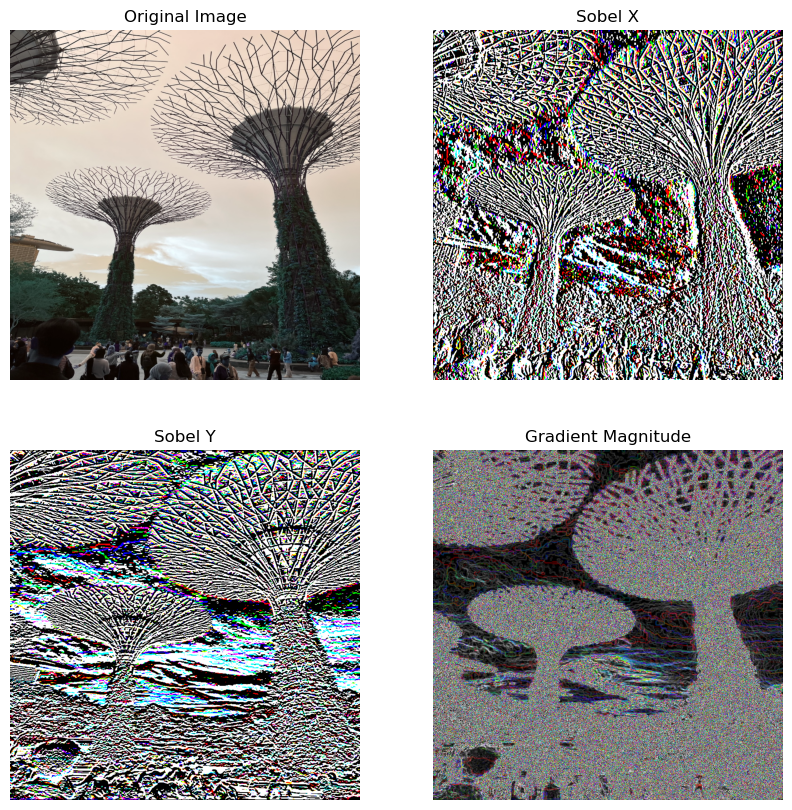

In [93]:
sobel_x = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=5)
sobel_y = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=5)

# Gradient magnitude 계산
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_magnitude = np.uint8(np.abs(gradient_magnitude))

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X'), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y'), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(gradient_magnitude, cmap='gray'), plt.title('Gradient Magnitude'), plt.axis('off')
plt.show()

## 2. Canny 엣지 검출 
1번 영상에 대해 s = 1, 3, 5, 7로 변화시킨 Canny 에지 검출을 수행하고 소스 코드와 결과 영상을 제시. Threshold를 적절히 조절. s 를 조절 하는 경우 Canny 함수를 호출하기 전에 Gaussian convolution을 먼저 해야 함.

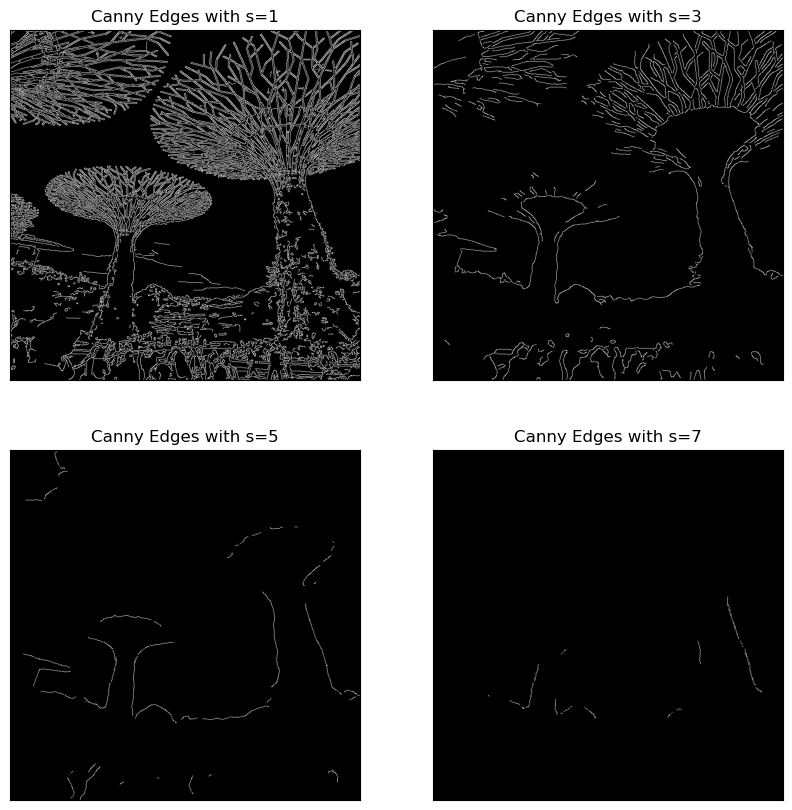

In [97]:
s_values = [1, 3, 5, 7]
results = []

for s in s_values:
    blurred_image = cv.GaussianBlur(image, (0, 0), sigmaX=s, sigmaY=s)
    canny_edges = cv.Canny(blurred_image, threshold1=50, threshold2=100)
    results.append(canny_edges)

plt.figure(figsize=(10, 10))
for i, result in enumerate(results):
    plt.subplot(2, 2, i + 1)
    plt.imshow(result, cmap='gray')
    plt.title(f'Canny Edges with s={s_values[i]}')
    plt.xticks([]), plt.yticks([])
plt.show()

## 3. Canny edge에서 방향 검출
a. 256x256 크기 영상에서 중심이 (128, 128) 이고 반경이 80 픽셀인 원을 생성. 배경의 색상은 50, 원의 색상은 200으로 지정. 

b. s = 1 인 Canny 방식으로 에지를 검출

c. 각 에지점의 방향을 검출하는 기능을 추가하여 각도가 30° ~ 60° 인 픽셀들만 검출하여 디스플레이 함

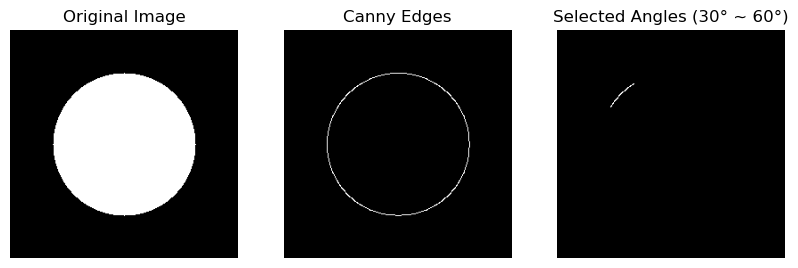

In [98]:
image = np.full((256, 256), 50, dtype=np.uint8)
cv.circle(image, (128, 128), 80, 200, -1)

blurred_image = cv.GaussianBlur(image, (0, 0), sigmaX=1)
edges = cv.Canny(blurred_image, 100, 200)

sobel_x = cv.Sobel(blurred_image, cv.CV_64F, 1, 0, ksize=5)
sobel_y = cv.Sobel(blurred_image, cv.CV_64F, 0, 1, ksize=5)

angle = np.arctan2(sobel_y, sobel_x) * (180 / np.pi)

selected_edges = np.where((edges != 0) & (angle >= 30) & (angle <= 60), 255, 0).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(selected_edges, cmap='gray'), plt.title('Selected Angles (30° ~ 60°)'), plt.axis('off')
plt.show()

## 4. 실습 1~4의 코드와 결과를 제출함

### 실습1

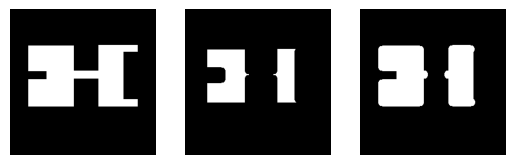

In [14]:
gray = cv.imread('./img/pattern.png')
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(15,15)) 
dilation = cv.erode(gray, kernel, iterations = 1)
closing = cv.morphologyEx(gray, cv.MORPH_OPEN, kernel)

plt.subplot(1,3,1) 
plt.imshow(gray) 
plt.axis('off')
plt.subplot(1,3,2) 
plt.imshow(dilation) 
plt.axis('off')
plt.subplot(1,3,3) 
plt.imshow(closing) 
plt.axis('off')
plt.show()

### 실습2

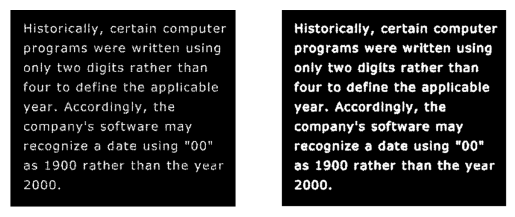

In [7]:
image = cv.imread('./img/0907.png')
kernel = cv.getStructuringElement(cv.MORPH_CROSS,(3,3)) 
dilation = cv.dilate(image, kernel, iterations=1)

plt.subplot(1,2,1) 
plt.imshow(image) 
plt.axis('off')
plt.subplot(1,2,2) 
plt.imshow(dilation)
plt.axis('off')
plt.show()

### 실습3

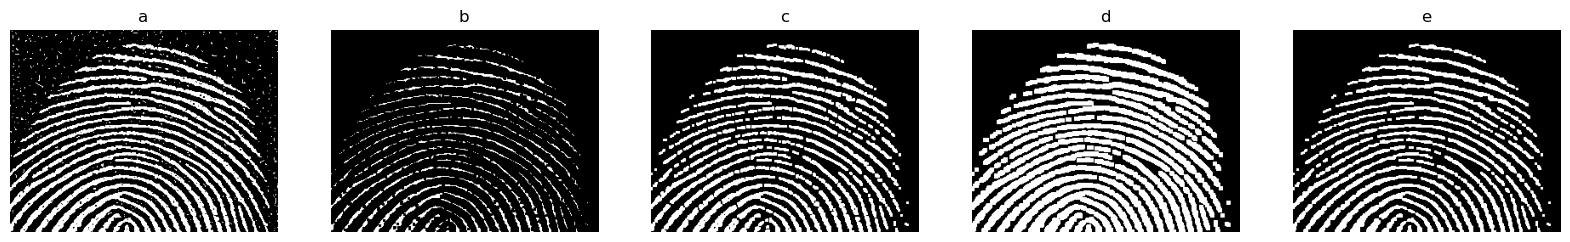

In [13]:
a = cv.imread('./img/0911.png')
kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3)) 
dilation = cv.dilate(image, kernel, iterations=1)

# Erosion -> Dilation -> Dilation -> Erosion 
b = cv.erode(a, kernel, iterations=1)
c = cv.dilate(b, kernel, iterations=1)
d = cv.dilate(c, kernel, iterations=1)
e = cv.erode(d, kernel, iterations=1)
3
plt.figure(figsize=(20, 20))
plt.subplot(1, 5, 1), plt.imshow(a, cmap='gray'), plt.title('a'), plt.axis('off')
plt.subplot(1, 5, 2), plt.imshow(b, cmap='gray'), plt.title('b'), plt.axis('off')
plt.subplot(1, 5, 3), plt.imshow(c, cmap='gray'), plt.title('c'), plt.axis('off')
plt.subplot(1, 5, 4), plt.imshow(d, cmap='gray'), plt.title('d'), plt.axis('off')
plt.subplot(1, 5, 5), plt.imshow(e, cmap='gray'), plt.title('e'), plt.axis('off')

plt.show()

### 실습4

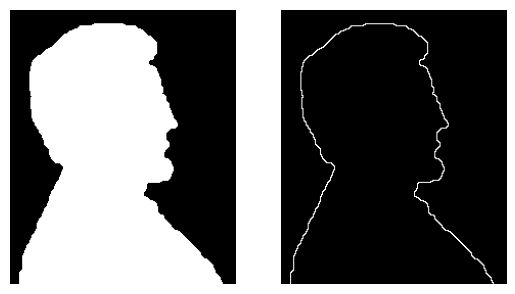

In [17]:
image = cv.imread('./img/0914.png')
kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3)) 
erosion = cv.erode(image, kernel, iterations=1)

plt.subplot(1,2,1) 
plt.imshow(image) 
plt.axis('off')
plt.subplot(1,2,2) 
plt.imshow(image - erosion)
plt.axis('off')
plt.show()

